/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0493
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6690e-04
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1763e-04
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1887e-04
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6813e-05
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2463e-05
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2603e-05
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1763e-05
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3132e-05
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3639e-05
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9404e-05
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1490e-05
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7802e-05
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━

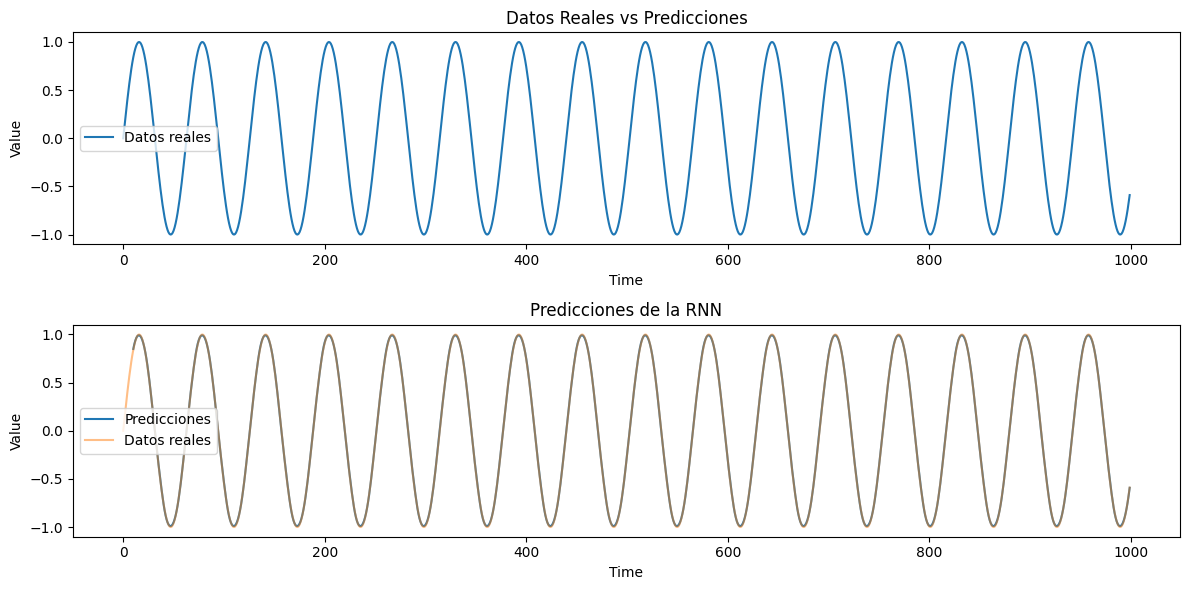

In [1]:
"""
This Python script builds and trains a Recurrent Neural Network (RNN) to predict future
values in a time series using a sine wave. It generates a dataset, reshapes it for the RNN,
builds the model, trains it, and visualizes the predictions.
"""
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt


# Generar datos de serie temporal
def generate_time_series(length):
    # The length parameter defines the length of the time series,
    # that is, how many data points the series will have.
    return np.sin(np.arange(length) * 0.1)


# Crear el dataset
time_series = generate_time_series(1000)
# creation of time series
X = [] #Initialization of data
y = []
time_steps = 10
# Definition of step time


for i in range(len(time_series) - time_steps):
    X.append(time_series[i:i + time_steps])
    y.append(time_series[i + time_steps])


X = np.array(X)
y = np.array(y)


# Redimensionar X para la RNN
X = X.reshape((X.shape[0], X.shape[1], 1))
# X.shape[0] is the number of samples.


# X.shape[1] is the number of time steps.


# Crear y entrenar el modelo RNN
# The use of Sequential() in Keras is to create a sequential model, which
# is appropriate when the neural network architecture is a simple stack of layers,
#  where each layer has exactly one input and one output. This is the most common and simplest case for building neural networks.
model = Sequential()


model.add(SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)))


# model.add(SimpleRNN(#number of neurons,
# activation function tanh, relu,  sigmoid, tanh,
# Step  time in each secuence of time
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32)


# Hacer predicciones
predictions = model.predict(X)


# Mostrar datos iniciales y predicciones
plt.figure(figsize=(12, 6))


# Gráfico de los datos reales
plt.subplot(2, 1, 1)
plt.plot(time_series, label='Datos reales')
plt.title('Datos Reales vs Predicciones')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()


# Gráfico de las predicciones
plt.subplot(2, 1, 2)
plt.plot(np.arange(time_steps, len(predictions) + time_steps), predictions, label='Predicciones')
plt.plot(np.arange(len(time_series)), time_series, label='Datos reales', alpha=0.5)
plt.title('Predicciones de la RNN')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()


plt.tight_layout()
plt.show()


#Modified Code

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1685
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1477e-04
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5498e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8710e-04
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8761e-04
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6837e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


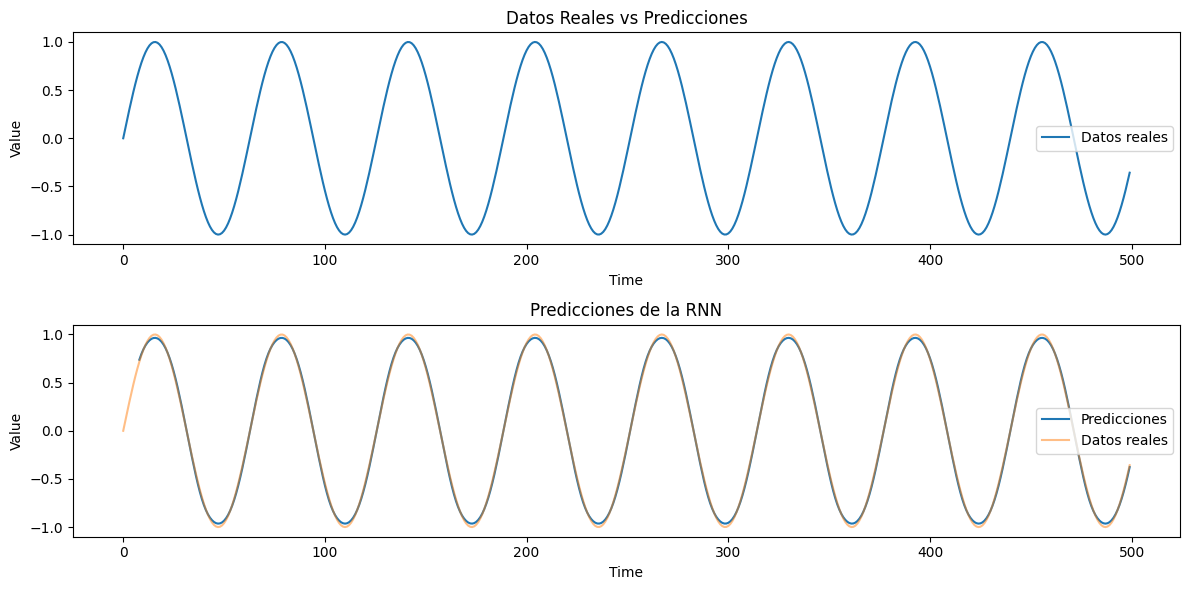

In [4]:
"""
This Python script builds and trains a Recurrent Neural Network (RNN) to predict future
values in a time series using a sine wave. It generates a dataset, reshapes it for the RNN,
builds the model, trains it, and visualizes the predictions.
"""
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt


# Generar datos de serie temporal
def generate_time_series(length):
    # The length parameter defines the length of the time series,
    # that is, how many data points the series will have.
    return np.sin(np.arange(length) * 0.1)


# Crear el dataset
time_series = generate_time_series(500)
# creation of time series
X = [] #Initialization of data
y = []
time_steps = 8
# Definition of step time


for i in range(len(time_series) - time_steps):
    X.append(time_series[i:i + time_steps])
    y.append(time_series[i + time_steps])


X = np.array(X)
y = np.array(y)


# Redimensionar X para la RNN
X = X.reshape((X.shape[0], X.shape[1], 1))
# X.shape[0] is the number of samples.


# X.shape[1] is the number of time steps.


# Crear y entrenar el modelo RNN
# The use of Sequential() in Keras is to create a sequential model, which
# is appropriate when the neural network architecture is a simple stack of layers,
#  where each layer has exactly one input and one output. This is the most common and simplest case for building neural networks.
model = Sequential()


model.add(SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)))


# model.add(SimpleRNN(#number of neurons,
# activation function tanh, relu,  sigmoid, tanh,
# Step  time in each secuence of time
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32)


# Hacer predicciones
predictions = model.predict(X)


# Mostrar datos iniciales y predicciones
plt.figure(figsize=(12, 6))


# Gráfico de los datos reales
plt.subplot(2, 1, 1)
plt.plot(time_series, label='Datos reales')
plt.title('Datos Reales vs Predicciones')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()


# Gráfico de las predicciones
plt.subplot(2, 1, 2)
plt.plot(np.arange(time_steps, len(predictions) + time_steps), predictions, label='Predicciones')
plt.plot(np.arange(len(time_series)), time_series, label='Datos reales', alpha=0.5)
plt.title('Predicciones de la RNN')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()


plt.tight_layout()
plt.show()


In [3]:
"""
This Python script builds and trains a Recurrent Neural Network (RNN) to predict the next word in a given text sequence.
The model uses an Embedding layer and a SimpleRNN layer. It tokenizes the input text, creates sequences for training,
and uses these sequences to train the model.
"""
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


# Texto de ejemplo para entrenamiento
text = "In a far away land, there was a small village with great people. The village was surrounded by mountains and rivers."


# Tokenizar el texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])[0]


vocab_size = len(tokenizer.word_index) + 1
sequence_length = 5


# Crear dataset de entrenamiento
X = []
y = []


for i in range(len(sequences) - sequence_length):
    X.append(sequences[i:i + sequence_length])
    y.append(sequences[i + sequence_length])


X = np.array(X)
y = to_categorical(y, num_classes=vocab_size)


# Crear y entrenar el modelo RNN
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=sequence_length))
model.add(SimpleRNN(50, activation='tanh'))
model.add(Dense(vocab_size, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=20, batch_size=32)


# Guardar el modelo entrenado
model.save('text_prediction_rnn.h5')


# Generar texto utilizando el modelo entrenado
def generate_text(model, tokenizer, seed_text, num_words):
    for _ in range(num_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        if len(encoded) < sequence_length:
            encoded = np.pad(encoded, (sequence_length - len(encoded), 0), 'constant')
        else:
            encoded = np.array(encoded[-sequence_length:])
        encoded = encoded.reshape(1, sequence_length)


        y_pred = np.argmax(model.predict(encoded), axis=-1)
        word = tokenizer.index_word[y_pred[0]]
        seed_text += ' ' + word
    return seed_text


# Generar nuevo texto basado en un texto inicial
seed_text = "there was far"
generated_text = generate_text(model, tokenizer, seed_text, 10)
print(generated_text)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0625 - loss: 2.9558
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0625 - loss: 2.9403
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0625 - loss: 2.9250
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1250 - loss: 2.9097
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1250 - loss: 2.8945
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1875 - loss: 2.8790
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1875 - loss: 2.8633
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1875 - loss: 2.8472
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3125 - loss: 2.8306
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3125 - loss: 2.8134
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3125 - loss: 2.7956
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.3750 - loss: 2.7769
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
there was far was was great was was great was village great village


#Modified code

In [5]:
"""
This Python script builds and trains a Recurrent Neural Network (RNN) to predict the next word in a given text sequence.
The model uses an Embedding layer and a SimpleRNN layer. It tokenizes the input text, creates sequences for training,
and uses these sequences to train the model.
"""
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


# Texto de ejemplo para entrenamiento
text = "In a far away land, there was a small village with great people. The village was surrounded by mountains and rivers."


# Tokenizar el texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])[0]


vocab_size = len(tokenizer.word_index) + 1
sequence_length = 5


# Crear dataset de entrenamiento
X = []
y = []


for i in range(len(sequences) - sequence_length):
    X.append(sequences[i:i + sequence_length])
    y.append(sequences[i + sequence_length])


X = np.array(X)
y = to_categorical(y, num_classes=vocab_size)


# Crear y entrenar el modelo RNN
model = Sequential()
model.add(Embedding(vocab_size, 5, input_length=sequence_length))
model.add(SimpleRNN(50, activation='tanh'))
model.add(Dense(vocab_size, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=20, batch_size=32)


# Guardar el modelo entrenado
model.save('text_prediction_rnn.h5')


# Generar texto utilizando el modelo entrenado
def generate_text(model, tokenizer, seed_text, num_words):
    for _ in range(num_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        if len(encoded) < sequence_length:
            encoded = np.pad(encoded, (sequence_length - len(encoded), 0), 'constant')
        else:
            encoded = np.array(encoded[-sequence_length:])
        encoded = encoded.reshape(1, sequence_length)


        y_pred = np.argmax(model.predict(encoded), axis=-1)
        word = tokenizer.index_word[y_pred[0]]
        seed_text += ' ' + word
    return seed_text


# Generar nuevo texto basado en un texto inicial
seed_text = "I will have"
generated_text = generate_text(model, tokenizer, seed_text, 10)
print(generated_text)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0625 - loss: 2.9526
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0625 - loss: 2.9430
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0625 - loss: 2.9335
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1250 - loss: 2.9240
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1250 - loss: 2.9143
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1250 - loss: 2.9044
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0625 - loss: 2.8942
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0625 - loss: 2.8836
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1250 - loss: 2.8724
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1250 - loss: 2.8606
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1875 - loss: 2.8482
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1875 - loss: 2.8349
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
I will have village village village village village village village village village village


In [2]:
"""
This Python script builds and trains a Recurrent Neural Network (RNN) to generate text based on an input sequence.
The model uses an Embedding layer and a SimpleRNN layer to predict the next word in a sequence.
"""
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np


# Datos de entrada
text = "esta es una demostración de cómo una RNN puede generar texto basado en un texto de entrada."


# Tokenizar el texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
encoded = tokenizer.texts_to_sequences([text])[0]


# Preparar datos
vocab_size = len(tokenizer.word_index) + 1
sequences = []
for i in range(1, len(encoded)):
    sequence = encoded[:i+1]
    sequences.append(sequence)
sequences = pad_sequences(sequences, maxlen=max(len(seq) for seq in sequences), padding='pre')
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)


# Crear el modelo RNN
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
model.fit(X, y, epochs=500, verbose=0)


# Generar texto
def generate_text(model, tokenizer, seed_text, n_words):
    result = seed_text
    for _ in range(n_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded], maxlen=X.shape[1], padding='pre')
        y_pred = np.argmax(model.predict(encoded), axis=-1)
        word = tokenizer.index_word[y_pred[0]]
        seed_text += ' ' + word
        result += ' ' + word
    return result


# Texto generado
print(generate_text(model, tokenizer, 'esta es', 10))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
esta es una demostración de cómo una rnn puede generar texto basado


#Modified code

In [6]:
"""
This Python script builds and trains a Recurrent Neural Network (RNN) to generate text based on an input sequence.
The model uses an Embedding layer and a SimpleRNN layer to predict the next word in a sequence.
"""
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np


# Datos de entrada
text = "esta es una demostración de cómo una RNN puede generar texto basado en un texto de entrada."


# Tokenizar el texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
encoded = tokenizer.texts_to_sequences([text])[0]


# Preparar datos
vocab_size = len(tokenizer.word_index) + 1
sequences = []
for i in range(1, len(encoded)):
    sequence = encoded[:i+1]
    sequences.append(sequence)
sequences = pad_sequences(sequences, maxlen=max(len(seq) for seq in sequences), padding='pre')
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)


# Crear el modelo RNN
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
model.fit(X, y, epochs=1000, verbose=0)


# Generar texto
def generate_text(model, tokenizer, seed_text, n_words):
    result = seed_text
    for _ in range(n_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded], maxlen=X.shape[1], padding='pre')
        y_pred = np.argmax(model.predict(encoded), axis=-1)
        word = tokenizer.index_word[y_pred[0]]
        seed_text += ' ' + word
        result += ' ' + word
    return result


# Texto generado
print(generate_text(model, tokenizer, 'esta es', 10))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
esta es una demostración de cómo una rnn puede generar texto basado
